#### Implement a simple deep neural network (DNN) for solving the polynomial equation y=5x3-10x2-20x+10

In [9]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

#### Generating training samples within the range of -20 to +20

In [10]:
x = np.linspace(-20,20,1000)
y = 5 * x**3 - 10 * x**2 - 20 * x + 10
print(f"length of x = {len(x)}")
print(f"length of y = {len(y)}")

length of x = 1000
length of y = 1000


### Normalizing the training data in the range of -1 to +1. 
The formula for **Min-Max Normalization** is:
$$
\text{Normalized Value} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} \times (\text{range\_max} - \text{range\_min}) + \text{range\_min}
$$
#### Explanation:
- **$x$:** The original data point.
- **$\text{min}(x)$:** The minimum value in the dataset.
- **$\text{max}(x)$:** The maximum value in the dataset.
- **$\text{range\_min}$:** The lower bound of the target range (e.g., $-1$).
- **$\text{range\_max}$:** The upper bound of the target range (e.g., $1$).





In [11]:
# Normalize x to the range [-1, 1]
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1

#### Using 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.


In [12]:
# Split data: 90% training, 5% validation, 5% testing
x_train, x_temp, y_train, y_temp = train_test_split(x_normalized, y_normalized, test_size=0.1, train_size=0.9, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5, random_state=42)


#### Using a 3-layer DNN with hidden sizes 32, 64, and 128, and displaying the total parameters.

In [13]:
inputs = Input(shape=(1,), name='InputLayer')
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, name='OutputLayer')(x)
model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4247 - loss: 0.0776 - val_accuracy: 0.8448 - val_loss: 0.0248
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.0213 - val_accuracy: 0.9174 - val_loss: 0.0132
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9229 - loss: 0.0107 - val_accuracy: 0.9592 - val_loss: 0.0065
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.0059 - val_accuracy: 0.9800 - val_loss: 0.0032
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0025 - val_accuracy: 0.9891 - val_loss: 0.0017
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0015 - val_accuracy: 0.9927 - val_loss: 0.0012
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0010 - val_accuracy: 0.9947 - val_loss: 8.4338e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9954 - loss: 6.6740e-04 - val_accuracy: 0

### Displaying the training accuracy vs validation accuracy and training error vs validation error curves

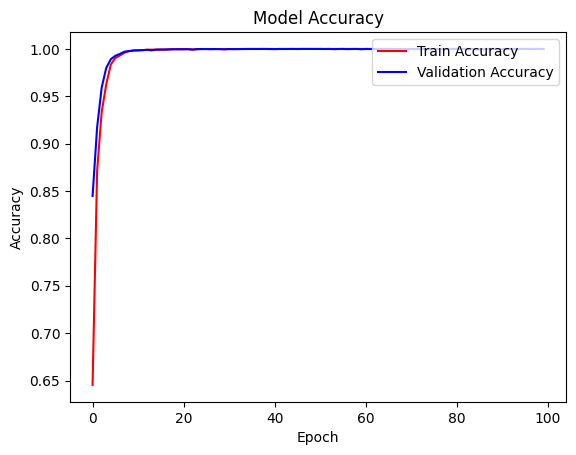

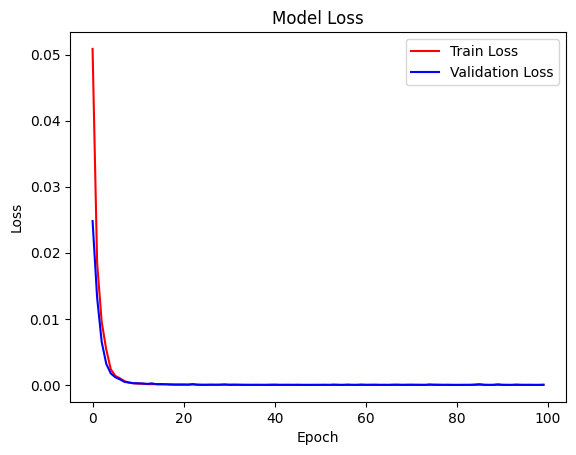

In [17]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'],color='r')# Access training accuracy over epochs
plt.plot(history.history['val_accuracy'],color='b')# Access validation accuracy over epochs
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'],color='r')# Access loss during training
plt.plot(history.history['val_loss'],color='blue')# Access validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [24]:
result = model.evaluate(x_test, y_test)
print(f"Test Loss: {result[0]*100:.3f}%")
print(f"Test Accuracy: {result[1]*100:.3f}%")



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9997 - loss: 3.3308e-05
Test Loss: 0.003%
Test Accuracy: 99.974%
